In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import torchvision as tv
import moviepy
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import time
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from tqdm import tnrange
import av
from tqdm import tqdm

os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

from moviepy.editor import VideoFileClip

In [2]:
cpu = torch.device('cpu')
cuda = torch.device('cuda')

video_name = "15S1-MH1800-LEC_20150817"

In [3]:
all_file_paths = os.listdir("../data/Processed/")
only_movie_paths = [a for a in all_file_paths if a[-4:] == ".mp4"]
only_movie_paths

['17S2-BS1102-LEC_20180126.mp4',
 '16S2-MH1402-LEC_20170324.mp4',
 '15S2-MH1402-LEC_20160129.mp4',
 '17S2-MH1811-LEC_20180219.mp4',
 '17S1-PH1011-LEC_20171024.mp4',
 '18S1-BS1101-LEC_20181023.mp4',
 '17S1-PH1801-LEC_20170921.mp4',
 '17S1-PH1011-LEC_20170815.mp4',
 '18S1-MH1802-LEC_20180827.mp4',
 '17S2-BS1102-LEC_20180125.mp4',
 '17S2-MH1804-LEC_20180315.mp4',
 '17S2-MH1811-LEC_20180212.mp4',
 '17S1-PH1801-LEC_20170824.mp4',
 '18S1-BS1101-LEC_20181019.mp4',
 '17S1-MH1100-LEC_20171020.mp4',
 '17S2-PH1107-CY1307-LEC_20180213.mp4',
 '18S1-MH1100-LEC_20180913.mp4',
 '18S1-BS1101-LEC_20181015.mp4',
 '18S1-PH1801-LEC_20180831.mp4',
 '17S1-PH1011-LEC_20171031.mp4',
 '17S2-MH1811-LEC_20180207.mp4',
 '17S2-MH1301-LEC_20180205.mp4',
 '15S1-MH1800-LEC_20151012.mp4',
 '15S2-PH1106-LEC_20160127.mp4',
 '18S1-BS1101-LEC_20181022.mp4',
 '15S2-MH1402-LEC_20160122.mp4',
 '15S1-MH1812-LEC_20150914.mp4',
 '18S1-MH1100-LEC_20180831.mp4',
 '17S2-MH1804-LEC_20180412.mp4',
 '17S2-PH1802-LEC_20180316.mp4',
 'P

In [18]:
video = tv.io.video.read_video(f"../data/Processed/{video_name}.mp4", start_pts=1200, end_pts=1210, pts_unit='sec')[0].to(cuda)
video = grayscale(video)
video.shape

torch.Size([303, 720, 1440])

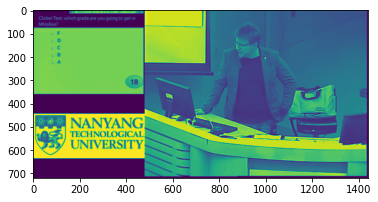

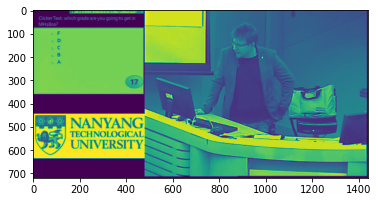

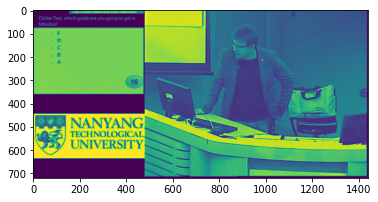

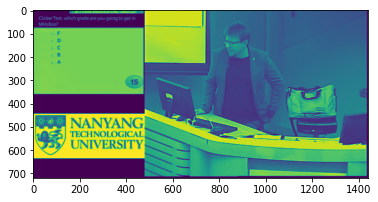

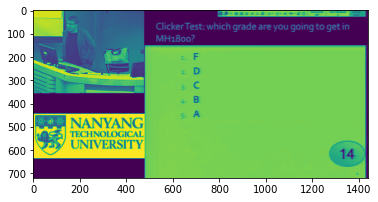

In [14]:
def grayscale(V):
    return (V*torch.cuda.FloatTensor([0.3, 0.59, 0.11]).view(1,1,1,3)).sum(3).floor()

for i in range(0, 150, 30):
    plt.imshow(video[i].to(cpu))
    plt.show()

In [23]:
dataset = pd.read_csv("../data/all_observations.tsv", sep='\t', parse_dates=True)
dataset

Unnamed: 0                                           Behavior  \
0               0                                        eye contact   
1               1                                  Writing on slides   
2               2  use of voice intonation to Emphasise more impo...   
3               3                                S, Asking questions   
4               4                                P, Asking questions   
...           ...                                                ...   
40941       40941                                P, cHarts in slides   
40942       40942                                  Writing on slides   
40943       40943                                  Writing on slides   
40944       40944                                  Writing on slides   
40945       40945                                  Writing on slides   

      Behavior type                                Behavioral category  \
0             STATE                     Encouraging learner engagement   
1             STATE     Providing clear explanation; Arousing interest   
2             STATE  Encouraging learner engagement; Pacing and mai...   
3             STATE  Activating prior knowledge; Encouraging learne...   
4             POINT  Activating prior knowledge; Encouraging learne...   
...             ...                                                ...   
40941         POINT     Providing clear explanation; Arousing interest   
40942         STATE     Providing clear explanation; Arousing interest   
40943         STATE     Providing clear explanation; Arousing interest   
40944         STATE     Providing clear explanation; Arousing interest   
40945         STATE     Providing clear explanation; Arousing interest   

       Comment start Comment stop  Duration (s)    FPS  \
0                NaN          NaN      2841.008  29.83   
1                NaN          NaN      2739.504  29.83   
2                NaN          NaN         4.002  29.83   
3                NaN          NaN        29.062  29.83   
4                NaN          NaN           NaN  29.83   
...              ...          ...           ...    ...   
40941            NaN          NaN           NaN  29.26   
40942            NaN          NaN         2.252  29.26   
40943            NaN          NaN         3.000  29.26   
40944            NaN          NaN         3.000  29.26   
40945            NaN          NaN         6.429  29.26   

                                              Media file Modifiers  \
0      C:/Users/ACER/Downloads/PH1011-PHYSICS_2015092...       NaN   
1      C:/Users/ACER/Downloads/PH1011-PHYSICS_2015092...       NaN   
2      C:/Users/ACER/Downloads/PH1011-PHYSICS_2015092...       NaN   
3      C:/Users/ACER/Downloads/PH1011-PHYSICS_2015092...     audio   
4      C:/Users/ACER/Downloads/PH1011-PHYSICS_2015092...     audio   
...                                                  ...       ...   
40941  C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150...       NaN   
40942  C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150...       NaN   
40943  C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150...       NaN   
40944  C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150...       NaN   
40945  C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150...       NaN   

          Observation date      Observation id  Start (s)  Stop (s)  \
0      2019-11-30 08:32:25  J1S1C11L1-I10-RA13     29.355  2870.363   
1      2019-11-30 08:32:25  J1S1C11L1-I10-RA13    132.351  2871.855   
2      2019-11-30 08:32:25  J1S1C11L1-I10-RA13    350.396   354.398   
3      2019-11-30 08:32:25  J1S1C11L1-I10-RA13    357.794   386.856   
4      2019-11-30 08:32:25  J1S1C11L1-I10-RA13    358.794   358.794   
...                    ...                 ...        ...       ...   
40941  2019-10-18 22:34:33     J4S1C6L3-I6-RA9   5228.956  5228.956   
40942  2019-10-18 22:34:33     J4S1C6L3-I6-RA9   5230.731  5232.983   
40943  2019-10-18 22:34:33     J4S1C6L3-I6-RA9   5250.231  5253.231   
40944

In [31]:
#15S1-MH1800-LEC_20150817
pd.options.display.max_colwidth = 300
dataset[dataset['Media file'].str.contains(video_name+'.mp4')]['Media file']

3398                             C:/Users/zhlim/Downloads/15S1-MH1800-LEC_20150817.mp4
3399                             C:/Users/zhlim/Downloads/15S1-MH1800-LEC_20150817.mp4
3400                             C:/Users/zhlim/Downloads/15S1-MH1800-LEC_20150817.mp4
3401                             C:/Users/zhlim/Downloads/15S1-MH1800-LEC_20150817.mp4
3402                             C:/Users/zhlim/Downloads/15S1-MH1800-LEC_20150817.mp4
                                             ...                                      
3608    C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150817/15S1-MH1800-LEC_20150817.mp4
3609    C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150817/15S1-MH1800-LEC_20150817.mp4
3610    C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150817/15S1-MH1800-LEC_20150817.mp4
3611    C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150817/15S1-MH1800-LEC_20150817.mp4
3612    C:/Users/yunda/Downloads/15S1-MH1800-LEC_20150817/15S1-MH1800-LEC_20150817.mp4
Name: Media file, Length: 215, dtype: objec

In [15]:
from moviepy.editor import VideoFileClip

sum_duration = 0

for path in tqdm(only_movie_paths):
    try:
        a = VideoFileClip("../data/Processed/" + path)
        sum_duration += a.duration
    except Exception as e:
        print(f'failed to read file {path}')
        print(e)

sum_duration

 16%|█▌        | 30/185 [00:17<01:29,  1.73it/s]Exception ignored in: <function AudioFileClip.__del__ at 0x7fd063e189e0>
Traceback (most recent call last):
  File "/home/jjasek/.conda/envs/env/lib/python3.7/site-packages/moviepy/audio/io/AudioFileClip.py", line 94, in __del__
    self.close()
  File "/home/jjasek/.conda/envs/env/lib/python3.7/site-packages/moviepy/audio/io/AudioFileClip.py", line 89, in close
    if self.reader:
AttributeError: 'AudioFileClip' object has no attribute 'reader'
 81%|████████  | 149/185 [01:24<00:20,  1.75it/s]

failed to read file 15S1-MH1800-LEC_20151026.mp4
MoviePy error: failed to read the duration of file ../data/Processed/15S1-MH1800-LEC_20151026.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libo

100%|██████████| 185/185 [01:45<00:00,  1.75it/s]


1083746.8100000005

In [5]:
len(only_movie_paths), only_movie_paths

(185,
 ['17S2-BS1102-LEC_20180126.mp4',
  '16S2-MH1402-LEC_20170324.mp4',
  '15S2-MH1402-LEC_20160129.mp4',
  '17S2-MH1811-LEC_20180219.mp4',
  '17S1-PH1011-LEC_20171024.mp4',
  '18S1-BS1101-LEC_20181023.mp4',
  '17S1-PH1801-LEC_20170921.mp4',
  '17S1-PH1011-LEC_20170815.mp4',
  '18S1-MH1802-LEC_20180827.mp4',
  '17S2-BS1102-LEC_20180125.mp4',
  '17S2-MH1804-LEC_20180315.mp4',
  '17S2-MH1811-LEC_20180212.mp4',
  '17S1-PH1801-LEC_20170824.mp4',
  '18S1-BS1101-LEC_20181019.mp4',
  '17S1-MH1100-LEC_20171020.mp4',
  '17S2-PH1107-CY1307-LEC_20180213.mp4',
  '18S1-MH1100-LEC_20180913.mp4',
  '18S1-BS1101-LEC_20181015.mp4',
  '18S1-PH1801-LEC_20180831.mp4',
  '17S1-PH1011-LEC_20171031.mp4',
  '17S2-MH1811-LEC_20180207.mp4',
  '17S2-MH1301-LEC_20180205.mp4',
  '15S1-MH1800-LEC_20151012.mp4',
  '15S2-PH1106-LEC_20160127.mp4',
  '18S1-BS1101-LEC_20181022.mp4',
  '15S2-MH1402-LEC_20160122.mp4',
  '15S1-MH1812-LEC_20150914.mp4',
  '18S1-MH1100-LEC_20180831.mp4',
  '17S2-MH1804-LEC_20180412.mp4',
 

In [6]:
from moviepy.editor import VideoFileClip

sum_duration = 0

for path in tqdm(only_movie_paths):
    try:
        a = VideoFileClip("../data/Processed/" + path)
        sum_duration += a.duration
    except Exception as e:
        print(f'failed to read file {path}')
        print(e)

sum_duration

 81%|████████  | 150/185 [01:33<00:16,  2.14it/s]

failed to read file 15S1-MH1800-LEC_20151026.mp4
MoviePy error: failed to read the duration of file ../data/Processed/15S1-MH1800-LEC_20151026.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 2.8.17-0ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.12) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable

100%|██████████| 185/185 [01:54<00:00,  1.61it/s]


1083746.8100000005

In [7]:
a.duration

7199.3

In [8]:
path

'17S2-BS1102-LEC_20180201.mp4'